### netcdf example for PMEL tools - Drifters and Alamo Floats (2018) - cartopy

__pyversion__==3.7   
__author__==S.Bell

### connecting and basic information

In [4]:
%matplotlib inline

import xarray as xa
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
clist = list(colors.keys())


Get only ARGOS Drifter datafiles

# Using Cartopy

In [5]:
### specify primary bulk figure parameters
fontsize = 10
labelsize = 12
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

11012


/Volumes/WDC_internal/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/core/groupby.py:749: FutureWarning: Default reduction dimension will be changed to the grouped dimension after xarray 0.12. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  allow_lazy=True, **kwargs)


11014


/Volumes/WDC_internal/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/core/groupby.py:749: FutureWarning: Default reduction dimension will be changed to the grouped dimension after xarray 0.12. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  allow_lazy=True, **kwargs)


11015


/Volumes/WDC_internal/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/core/groupby.py:749: FutureWarning: Default reduction dimension will be changed to the grouped dimension after xarray 0.12. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  allow_lazy=True, **kwargs)


11016


/Volumes/WDC_internal/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/core/groupby.py:749: FutureWarning: Default reduction dimension will be changed to the grouped dimension after xarray 0.12. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  allow_lazy=True, **kwargs)


11018


/Volumes/WDC_internal/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/core/groupby.py:749: FutureWarning: Default reduction dimension will be changed to the grouped dimension after xarray 0.12. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  allow_lazy=True, **kwargs)


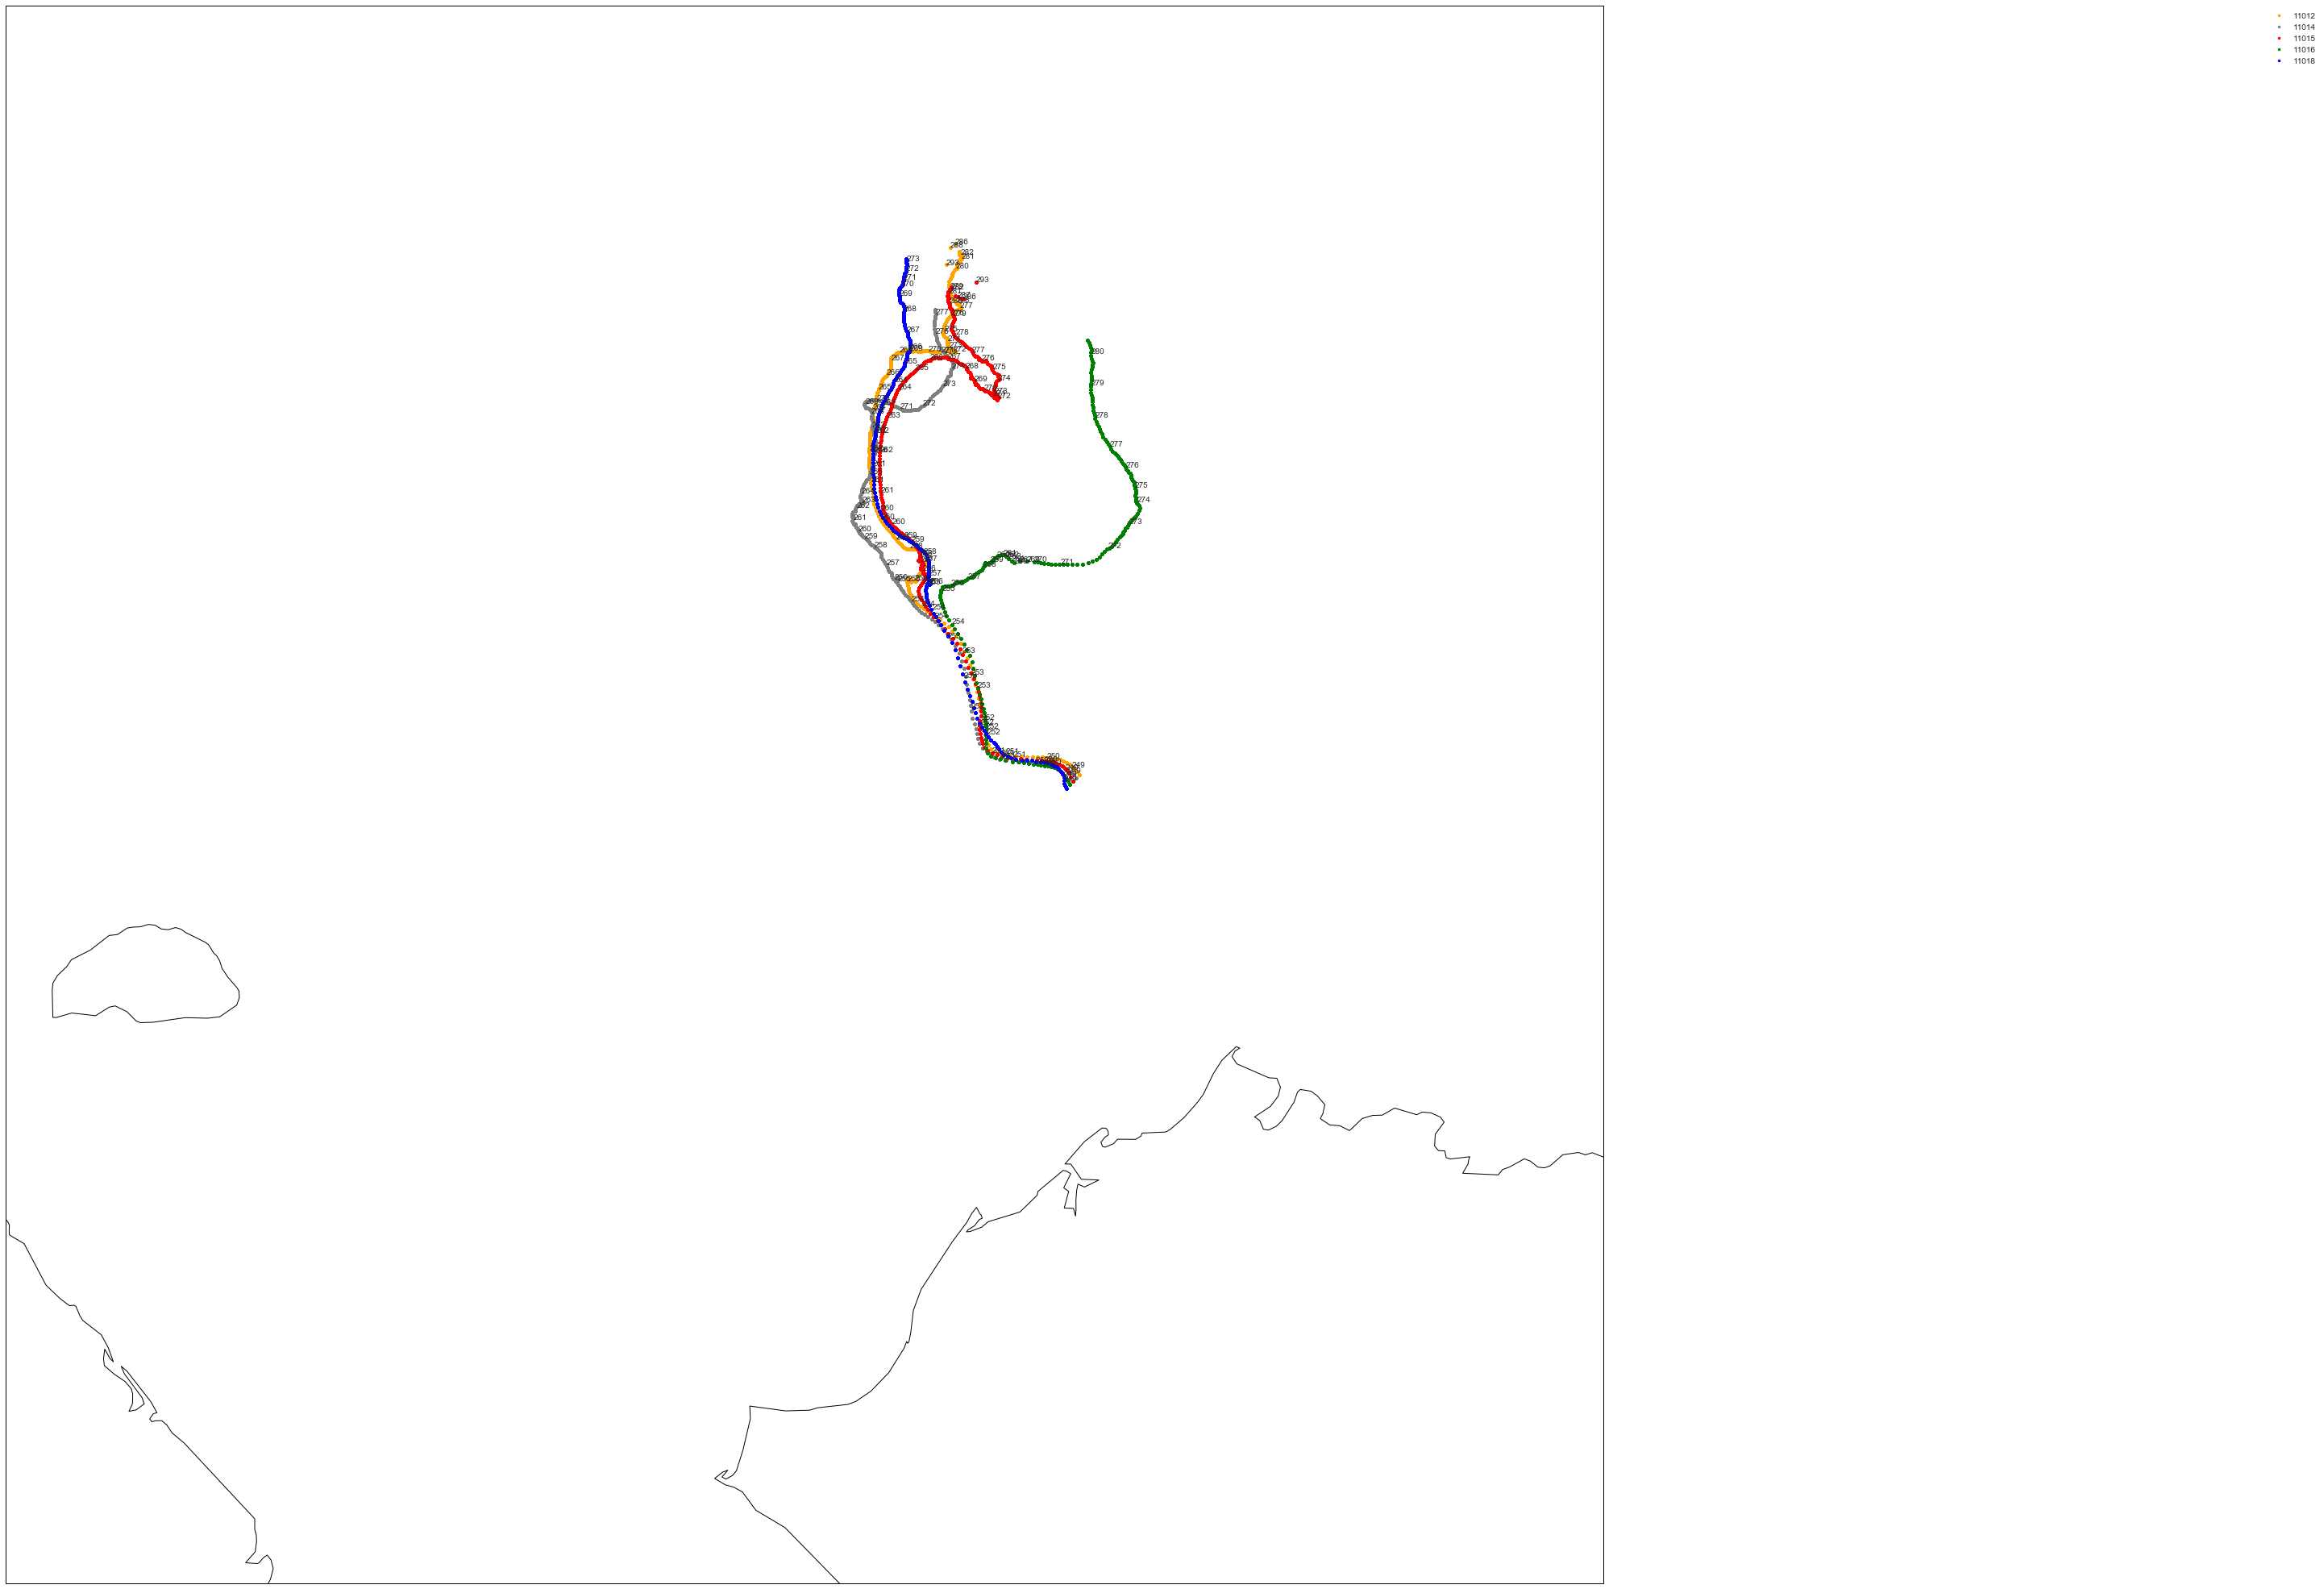

In [6]:
import collections


def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(36, 36),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')
dx = dy = 0.5
extent = [-180, -150, 67.5, 77.5]

archive_path = '/Volumes/Archive/ecoraid/NonEcoFOCI_ProjectData/ArcticHeat/ALAMO/netcdf/'
#AlamoID = ['9154','9121','11010','9199','9197']
AlamoID=['11012','11014','11015','11016','11018']


wanted_keys = ['orange','grey', 'red', 'green', 'blue'] # The keys you want

fig,ax = make_map(projection=projection)
acount = 0
for alamo in AlamoID:
    print(alamo)
    dataxa = xa.open_mfdataset(archive_path + alamo + '/*.nc', concat_dim='N_LEVELS')

    sfc=dataxa.groupby('JULD.dayofyear').mean()
    
    ax.plot(dataxa.LONGITUDE.values[:,0][dataxa.LONGITUDE.values[:,0]<900],
            dataxa.LATITUDE.values[:,0][dataxa.LONGITUDE.values[:,0]<900],
            '.', markersize=5,
            color=wanted_keys[acount], label=alamo, transform=transformation)
    
    for i,v in enumerate(sfc.LONGITUDE.values):
        #print(sfc.dayofyear.values.astype('str')[i])
        ax.text(x=v,
                y=sfc.LATITUDE.values[i], 
                s=sfc.dayofyear.values.astype('str')[i], transform=transformation)
    acount +=1
leg = ax.legend(bbox_to_anchor=(1.45,1), loc='upper right')

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

concat_ids = "_".join(AlamoID)
fig.savefig('ArcticAlamo_'+ concat_ids + 'map.png',dpi=300)
#fig.savefig('ArcticAlamo_'+ concat_ids + 'map.svg',dpi=300)

In [8]:
sfc=dataxa.groupby('JULD.dayofyear').mean()

/Volumes/WDC_internal/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/core/groupby.py:749: FutureWarning: Default reduction dimension will be changed to the grouped dimension after xarray 0.12. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  allow_lazy=True, **kwargs)


In [16]:
sfc.persist()

<xarray.Dataset>
Dimensions:       (dayofyear: 25)
Coordinates:
  * dayofyear     (dayofyear) int64 249 250 251 252 253 ... 269 270 271 272 273
Data variables:
    CYCLE_NUMBER  (dayofyear) float64 dask.array<shape=(25,), chunksize=(1,)>
    LATITUDE      (dayofyear) float64 dask.array<shape=(25,), chunksize=(1,)>
    LONGITUDE     (dayofyear) float64 dask.array<shape=(25,), chunksize=(1,)>
    PRES          (dayofyear) float64 dask.array<shape=(25,), chunksize=(1,)>
    TEMP          (dayofyear) float64 dask.array<shape=(25,), chunksize=(1,)>
    PSAL          (dayofyear) float64 dask.array<shape=(25,), chunksize=(1,)>